# Explore SWOT Sword of Science River Discharge data products

In [1]:
import netCDF4
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt

## Granule structure

The SWORD of Science (SoS) is a community-driven dataset produced for and from the execution of the Confluence workflow in the cloud which enables quick data access and compute on SWOT data. Data granules contain two files, priors and results. The priors file contains prior information, such as in-situ gage data and model output that is used to generate the discharge products. The results file contains the resulting river discharge data products.

The SoS is organized by continent following [SWOT River Database (SWORD)](https://www.swordexplorer.com/) structure and naming conventions. It is indexed on the same reach and node identifier dimensions found in SWORD. Time series data is stored by cycle and pass on an observation dimension.


More information is available in the SWOT-Confluence Github repository:
* [Documentation for priors](https://github.com/SWOT-Confluence/documentation/blob/main/documentation/confluence_data_description-priors.pdf)
* [Documentation for results](https://github.com/SWOT-Confluence/documentation/blob/main/documentation/confluence_data_description-results.pdf)



Results are organized into groups corresponding to modules in the SWOT-Confluence processing software. Modules are described in the [Confluence Module Documentation](https://github.com/SWOT-Confluence/documentation/blob/main/documentation/confluence_module_documentation_v1.0.pdf).

Start by opening the results SoS NetCDF file and investigating the available groups:

In [4]:
# Open the priors file:
priors = netCDF4.Dataset("/path/to/sos/priors/file.nc", format="NETCDF4")

# Open the results file
results = netCDF4.Dataset("/path/to/sos/results/file.nc", format="NETCDF4")

In [5]:
# Display the priors groups
print("Priors Groups:")
print(priors.groups)

Priors Groups:
{'reaches': <class 'netCDF4._netCDF4.Group'>
group /reaches:
    dimensions(sizes): 
    variables(dimensions): int64 reach_id(num_reaches), float64 x(num_reaches), float64 y(num_reaches), <class 'str'> river_name(num_reaches)
    groups: , 'nodes': <class 'netCDF4._netCDF4.Group'>
group /nodes:
    dimensions(sizes): 
    variables(dimensions): int64 node_id(num_nodes), int64 reach_id(num_nodes), float64 x(num_nodes), float64 y(num_nodes), <class 'str'> river_name(num_nodes)
    groups: , 'model': <class 'netCDF4._netCDF4.Group'>
group /model:
    dimensions(sizes): num_months(12), probability(20)
    variables(dimensions): int32 num_months(num_months), int32 probability(probability), float64 flow_duration_q(num_reaches, probability), float64 max_q(num_reaches), float64 monthly_q(num_reaches, num_months), float64 mean_q(num_reaches), float64 min_q(num_reaches), float64 two_year_return_q(num_reaches), int32 area_estimate_flag(num_reaches)
    groups: , 'gbpriors': <class

In [6]:
# Display the module groups
print("Results Groups:")
print(results.groups)

Results Groups:
{'reaches': <class 'netCDF4._netCDF4.Group'>
group /reaches:
    dimensions(sizes): 
    variables(dimensions): int64 reach_id(num_reaches), float64 x(num_reaches), float64 y(num_reaches), <class 'str'> river_name(num_reaches), int32 observations(num_reaches), float64 time(num_reaches)
    groups: , 'nodes': <class 'netCDF4._netCDF4.Group'>
group /nodes:
    dimensions(sizes): 
    variables(dimensions): int64 node_id(num_nodes), int64 reach_id(num_nodes), float64 x(num_nodes), float64 y(num_nodes), <class 'str'> river_name(num_nodes), int32 observations(num_nodes), float64 time(num_nodes)
    groups: , 'hivdi': <class 'netCDF4._netCDF4.Group'>
group /hivdi:
    dimensions(sizes): 
    variables(dimensions): float64 Q(num_reaches), float64 A0(num_reaches), float64 beta(num_reaches), float64 alpha(num_reaches)
    groups: , 'metroman': <class 'netCDF4._netCDF4.Group'>
group /metroman:
    dimensions(sizes): 
    variables(dimensions): float64 allq(num_reaches), float64 A

## Plot river reach locations

Information about the spatial location of river reaches is in the reaches and nodes groups including river names. This data is taken directly from [SWOT River Database (SWORD)](https://www.swordexplorer.com/).

In [7]:
reaches = results.groups['reaches']
print("Reaches Group")
print(reaches, "\n")
print("Longitude")
print(reaches.variables['x'])

Reaches Group
<class 'netCDF4._netCDF4.Group'>
group /reaches:
    dimensions(sizes): 
    variables(dimensions): int64 reach_id(num_reaches), float64 x(num_reaches), float64 y(num_reaches), <class 'str'> river_name(num_reaches), int32 observations(num_reaches), float64 time(num_reaches)
    groups:  

Longitude
<class 'netCDF4._netCDF4.Variable'>
float64 x(num_reaches)
    long_name: longitude
    comment: longitude of the reach center decimal ranging from 180°E to 180°W
    units: degrees_east
    valid_min: -180.0
    valid_max: 180.0
    coverage_content_type: coordinate
path = /reaches
unlimited dimensions: 
current shape = (38661,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [8]:
# Unpack the spatial coordinates and river names
reach_lon = results.groups['reaches'].variables['x']
reach_lat = results.groups['reaches'].variables['y']

river_names = results.groups['reaches'].variables['river_name']

# Filter data to only find the Mississippi River
idx = np.where(river_names[:] == 'Mississippi River')

In [9]:
idx

(array([ 8056,  8057,  8067,  8068, 13384, 13385, 13386, 13387, 13388,
        13389, 13390, 13391, 13392, 13393, 13394, 13395, 13396, 13397,
        13398, 13399, 13400, 13401, 13402, 13403, 13404, 13405, 13406,
        13407, 13408, 13409, 13410, 13411, 13412, 13413, 13414, 13415,
        13416, 13417, 13418, 13420, 13421, 13422, 13423, 13424, 13425,
        13426, 13427, 13428, 13948, 13949, 13950, 13961, 13962, 13963,
        13964, 13965, 13971, 13972, 13977, 13978, 13979, 13985, 14048,
        14049, 14050, 14051, 14052, 14053, 14054, 14055, 14056, 14057,
        14058, 14059, 14060, 14063, 14064, 14065, 14066, 14067, 14068,
        14073, 14865, 14866, 15092, 15093, 15094, 15095, 15096, 15097,
        15098, 15099, 15100, 15101, 15131, 15132, 15133, 15134, 15135,
        15136, 15137, 15138, 15139, 15140, 15141, 15142, 15143, 15144,
        15145, 15146, 15147, 15148, 15149, 15150, 15161, 15162, 15163,
        15164, 15165, 15166, 15167, 15168, 15169, 15170, 15171, 15172,
      

Text(0.5, 1.0, 'Mississippi River Reach Centerpoint Locations')

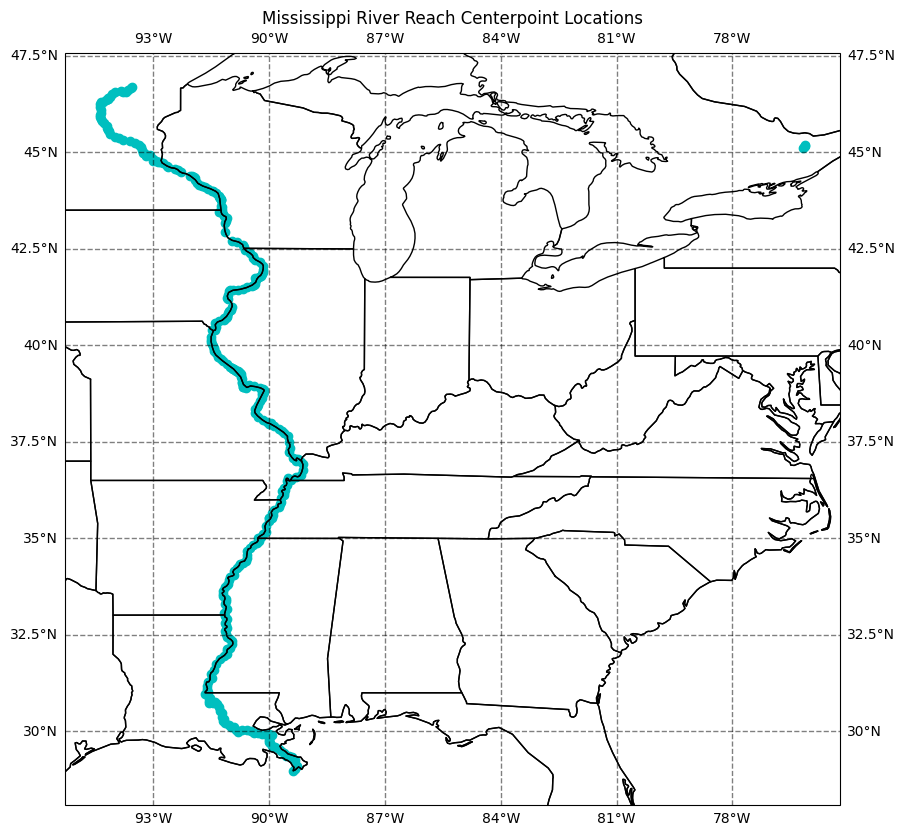

In [10]:
# Create the figure
fig = plt.figure(figsize=(10,10))

# Add map elements gridlines
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black')

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Plot the river reach centerpoint locations
ax.scatter(reach_lon[idx], y=reach_lat[idx], color='c')

# Add the title
plt.title('Mississippi River Reach Centerpoint Locations')

# Navigating Reaches and Nodes

The SoS is organized by continent following the conventions set in the [SWOT River Database](https://www.swordexplorer.com/) for the NetCDF file format. Reach identifiers can be found in the "reaches" group and node identifiers can be found in the "nodes" group. The following sections show you how to locate reaches and nodes by river name which allows you to index into the reach and/or node level data.

**How to locate reach and node identifiers by river name**

You can search for a river name using the same convention as used when plotting river reach locations to obtain the reach identifiers for that river. You can then use the reach identifiers to locate the nodes that belong to each reach for that river as the nodes are indexed on a different dimension (num_nodes) than reaches (num_reaches).

In [11]:
# Locate the indexes for the specific river you are interested in
river_names = results['reaches']['river_name'][:]
reach_idx = np.where(river_names[:] == 'Mississippi River')

# Locate the reach identifiers for the river name
reach_identifiers = results['reaches']['reach_id'][reach_idx]

# Locate the reach identifiers of interest on the node-level
reach_node_identifiers = results['nodes']['reach_id'][:]
node_idx = []
for reach_identifier in reach_identifiers:
    node_idx.extend(np.where(reach_node_identifiers == reach_identifier)[0])

# Locate the node identifiers of interest using the reach identifiers to index
node_identifiers = results['nodes']['node_id'][:]
print(node_identifiers)

[71120000010013 71120000010023 71120000010033 ... 73120001021066
 73120001031076 73120001041086]


In [12]:
# Unpack the spatial coordinates on the node level and index to values of interest
node_lon = results['nodes']['x'][node_idx]
node_lat = results['nodes']['y'][node_idx]
print(node_lon.shape)
print(node_lat.shape)

(16193,)
(16193,)


Text(0.5, 1.0, 'Mississippi River Node Centerpoint Locations')

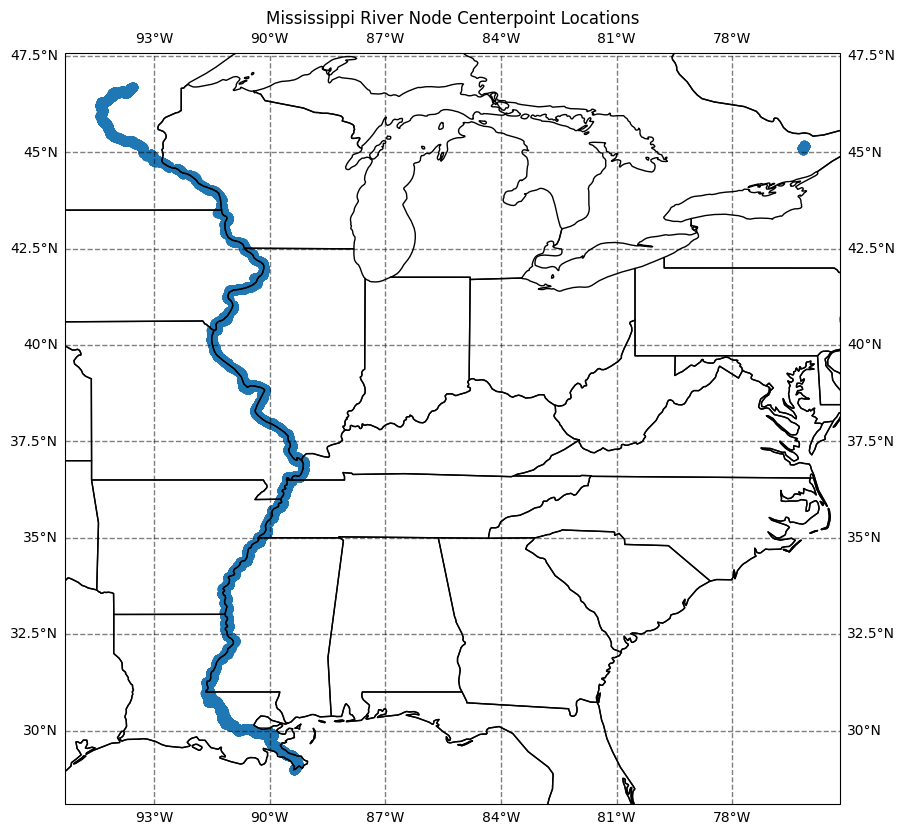

In [13]:
# Create the figure
fig = plt.figure(figsize=(10,10))

# Add map elements gridlines
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black')

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Plot the river reach centerpoint locations
ax.scatter(x=node_lon, y=node_lat)

# Add the title
plt.title('Mississippi River Node Centerpoint Locations')

## Plot Discharge Timeseries

The main data of interest in the results files is the timeseries of river discharge (q) estimates produced by each module. The SoS is a global dataset organized by continents and not every reach will have an associated discharge for each module. So it is helpful to filter out missing values in order to isolate and visualize discharge for the various modules.

### How to locate data amongst missing values

You can use the `missing_value` NetCDF variable attribute to locate the value used to indicate missing data. You can then filter on that value to isolate the time steps with discharge estimates. The following example uses the HiVDI algorithm results to demonstrate filtering missing values and plotting discharge.

In [14]:
# Retrieve discharge from HiVDI group
hivdi_q = results['hivdi']['Q'][:]

# Save the missing value
missing = results['hivdi']['Q'].missing_value

# Loop through each reach and filter out places where the missing value is present
data_indexes = []
for i in range(hivdi_q.shape[0]):
    if hivdi_q[i].shape[0] > 1:
        if np.any(hivdi_q[i] != missing): data_indexes.append(i) # For multiple time steps with non-missing values
    if hivdi_q[i].shape[0] == 1 and hivdi_q[i] != missing: data_indexes.append(i)  # For one time step with non-missing value

# Display the numeric indexes where discharge data is present
print(data_indexes)

[17816, 17817, 17818, 17821, 17825, 17826, 17828, 17829, 17929, 17931, 17932, 17933, 17934, 17935, 17937, 17938, 17940, 17951, 17952, 17953, 17954, 17955, 17956, 17958, 17959, 17961, 17962, 17963, 17964, 17965, 17966, 17967, 17968, 17970, 17973, 17974, 17975, 17995, 17997, 18019, 18020, 18021, 18022, 18023, 18024, 18025, 18027, 18028, 18029, 18030, 18031, 18032, 18033, 18050, 18287, 18288, 18289, 18290, 18293, 18294, 18295, 18296, 18297, 18298, 18299, 18300, 18302, 18305, 18306, 18307, 18309, 18325, 18329, 18333, 18334, 18335, 18336, 18337, 18338, 18339, 18384, 18385, 18387]


You can now use the data indexes to retrieve location, time, and river name data about the reaches that have discharge data.

In [15]:
# Review what river names are present in the data
print("River Names")
print(river_names[data_indexes])

platte_indexes = np.where(river_names  == "Platte River")
print("\nIndexes for the Platte River")
print(platte_indexes)

# Locate overlap
overlap_indexes = np.intersect1d(data_indexes, platte_indexes)
print("\nOverlapping indexes for the Platte River with HiVDI Discharge data")
print(overlap_indexes)

River Names
['Republican River' 'Republican River' 'Republican River'
 'Republican River' 'Republican River' 'Republican River'
 'Republican River' 'Republican River' 'Elkhorn River' 'Elkhorn River'
 'Elkhorn River' 'Elkhorn River' 'Elkhorn River' 'Elkhorn River'
 'Elkhorn River' 'Elkhorn River' 'Elkhorn River'
 'Loup River; Platte River' 'Loup River' 'Loup River' 'Loup River'
 'Cedar River' 'Cedar River; Loup River' 'Cedar River' 'Cedar River'
 'Cedar River' 'Cedar River' 'Cedar River' 'Loup River' 'Loup River'
 'Middle Loup River' 'Middle Loup River' 'Middle Loup River'
 'South Loup River' 'Middle Loup River; North Loup River'
 'North Loup River' 'North Loup River' 'South Loup River'
 'Middle Loup River' 'Platte River' 'Platte River' 'Platte River'
 'Platte River' 'Platte River' 'Platte River' 'Platte River'
 'Platte River; South Channel Platte River'
 'Middle Channel Platte River; South Channel Platte River'
 'Middle Channel Platte River' 'Middle Channel Platte River'
 'Middle Chann

In [16]:
# Select the first reach in the Platte River from the overlapping indexes
data_index = overlap_indexes[0]

# Locate the reach identifier
reach_id = reaches['reach_id'][data_index]
print(f"Platte reach identifier to plot: {reach_id}")

# Retrieve discharge
platte_q = hivdi_q[data_index]
print(f"\nDischarge for Platte reach identfier # {reach_id}")
print(platte_q)

# Retrieve time
time = results['reaches']['time'][data_index]
print(f"\nTime for Platte reach identfier # {reach_id}")
print(results['reaches']['time'][data_index])

Platte reach identifier to plot: 74294500011

Discharge for Platte reach identfier # 74294500011
[-1.00000000e+12  2.93097033e+02  2.86742962e+02  2.89465261e+02
 -1.00000000e+12  2.97263375e+02  2.97121940e+02 -1.00000000e+12
  2.87280710e+02 -1.00000000e+12  2.99686074e+02 -1.00000000e+12
 -1.00000000e+12  2.80211998e+02  2.80501426e+02  2.85340719e+02
  2.81533990e+02]

Time for Platte reach identfier # 74294500011
[7.34247402e+08 7.34333241e+08 7.34419079e+08 7.34504917e+08
 7.34590755e+08 7.34676593e+08 7.34762431e+08 7.34848269e+08
 7.34934107e+08 7.35191620e+08 7.35277458e+08 7.35363296e+08
 7.35449134e+08 7.35534972e+08 7.35620810e+08 7.35706648e+08
 7.35792486e+08]


In [17]:
# Filter any missing values out of reach identifier discharge and time
platte_index = np.where(platte_q != missing)

platte_q_data = platte_q[platte_index]
print(f"Discharge for Platte reach identfier # {reach_id}")
print(platte_q_data)

platte_time_data = time[platte_index]
print(f"\nTime for Platte reach identfier # {reach_id}")
print(platte_time_data)


Discharge for Platte reach identfier # 74294500011
[293.097033   286.74296176 289.46526075 297.26337463 297.12194033
 287.28070957 299.68607406 280.21199773 280.50142626 285.34071948
 281.53398993]

Time for Platte reach identfier # 74294500011
[7.34333241e+08 7.34419079e+08 7.34504917e+08 7.34676593e+08
 7.34762431e+08 7.34934107e+08 7.35277458e+08 7.35534972e+08
 7.35620810e+08 7.35706648e+08 7.35792486e+08]


Text(0.5, 0.98, 'Discharge Timeseries from HIVDI for the Platte River reach identifier: 74294500011.')

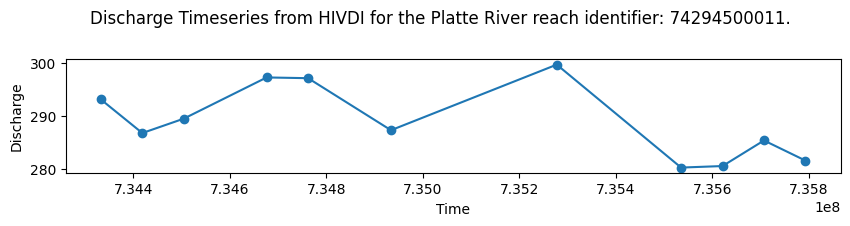

In [18]:
# Plot HiVDI Discharge for the Platte River Reach Identifier

# Set up plot
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(311)

# Plot data
ax1.scatter(platte_time_data, platte_q_data)
ax1.plot(platte_time_data, platte_q_data)

# Define labels and title
ax1.set_ylabel('Discharge')
ax1.set_xlabel('Time')

plt.suptitle(f"Discharge Timeseries from HIVDI for the Platte River reach identifier: {reach_id}.")


# Plotting integrator results for comparison

The SoS contains reach-level Flow Law Parameter (FLPE) algorithms: HiVDI, neoBAM, MetroMan, MOMMA, SAD, SIC4DVar that produce discharge estimates using SWOT observations, SoS Priors and SWORD data. It can be helpful to compare the reach-level FLPEs to the discharge values produced by the Mean Optimization Integrator (MOI). The MOI takes SWOT observation data and reach-level FLPE output and integrates the results. It uses river topology to force mass conservation and also defined uncertainty. 

In [19]:
# Locate MOI discharge results for HiVDI making sure to filter out missing values
moi_hivdi_q = results["moi"]["hivdi"]["q"][data_index]
moi_hivdi_q = moi_hivdi_q[platte_index]

print(f"HiVDI MOI Discharge for Platte reach identfier # {reach_id}")
print(moi_hivdi_q)

HiVDI MOI Discharge for Platte reach identfier # 74294500011
[29.6866929  27.22049792 27.29118217 32.74992663 32.52107848 26.2535517
 33.40301108 23.2251115  22.89540663 25.41377726 23.53852109]


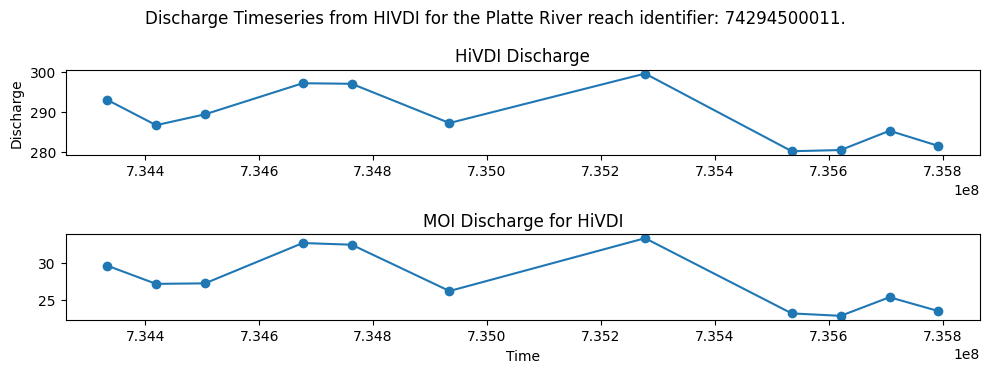

In [20]:
# Plot HiVDI discharge alongside MOI discharge

fig = plt.figure(figsize=(10,5))

# HiVDI Q
ax1 = plt.subplot(311)
ax1.scatter(platte_time_data, platte_q_data)
ax1.plot(platte_time_data, platte_q_data)

# MOI Q
ax2 = plt.subplot(312)
ax2.scatter(platte_time_data, moi_hivdi_q)
ax2.plot(platte_time_data, moi_hivdi_q)

# Define labels and title
ax1.set_ylabel('Discharge')
ax2.set_xlabel('Time')

ax1.set_title("HiVDI Discharge")
ax2.set_title("MOI Discharge for HiVDI")

plt.suptitle(f"Discharge Timeseries from HIVDI for the Platte River reach identifier: {reach_id}.")
plt.tight_layout()


# Table of Modules (Algorithms) and Discharge variables

The following lists the algorithms alongside their discharge variables and location in the SoS assuming that the SoS is an open file represented by the `results` variable.

| Module (Algorithm)               | Discharge Variable               | Location in the SoS              |
|----------------------------------|----------------------------------|----------------------------------|
| HiVDI                            | Q                                | results["hivdi"]["Q"]            |
| MetroMan                         | allq                             | results["metroman"]["allq"]      |
| MOMMA                            | Q_constrained                    | results["momma"]["Q_constrained"]|
| neoBAM                           | q1, q2, or q3                    | results["neobam"]["q"]["q1"]     |
| SAD                              | Qa                               | results["sad"]["Qa"]             |
| SIC4DVar                         | ?                                | results["sic4dvar"]["?"]         |
| MOI HiVDI                        | q                                | results["moi"]["hivdi"]["q"]     |
| MOI MetroMan                     | q                                | results["moi"]["metroman"]["q"]  |
| MOI MOMMA                        | q                                | results["moi"]["momma"]["q"]     |
| MOI neoBAM                       | q                                | results["moi"]["qeobam"]["q"]    |
| MOI SAD                          | q                                | results["moi"]["sad"]["q"]       |
| MOI SIC4DVar                     | q                                | results["moi"]["sic4dvar"]["q"]  |